# Pymaceuticals Inc.
Below you will find my analysis

### Analysis

 Capomulin and Ramicane demonstrate similar effectiveness in reducing tumor volume, with both treatments showing the lowest mean tumor volumes among the regimens. Ramicane has a slightly lower mean and variance compared to Capomulin, indicating more consistent results with less variability.
In contrast, treatments li Infubinol, Ketapril, and Naftisol** have much higher mean tumor volumes, variance, and standard deviations, suggesting less effectiveness and greater variability in their outcomes. Infubinol also shows an outlier, which may represent an inconsistent response to t e treatme. T

The strong correlation between mouse weight and tumor volume, with a correlation coefficient of 0.84, suggests that as mouse weight increaes, so does tumor size, highlighting the near-proportional relationship between the two variables.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].unique()
mice_number = len(mice)
mice_number

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicate = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated()]
mice_duplicate_type = mice_duplicate["Mouse ID"].unique()
mice_duplicate_type

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
mice_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_id_df = combined_data.drop_duplicates(subset = ['Mouse ID'])
drop_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [10]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(drop_id_df['Mouse ID'].unique())
number_mice

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_drug_data = combined_data.set_index(["Drug Regimen"])[['Tumor Volume (mm3)']]

drug_data_df = mice_drug_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_data_mean = drug_data_df["Tumor Volume (mm3)"].mean()
drug_data_median = drug_data_df["Tumor Volume (mm3)"].median()
drug_data_variance = drug_data_df["Tumor Volume (mm3)"].var()
drug_data_sd = drug_data_df["Tumor Volume (mm3)"].std()
drug_data_sem = drug_data_df["Tumor Volume (mm3)"].sem()


Statistical_summary_df = pd.DataFrame({
    "Mean Tumor Volume": drug_data_mean,
    "Median Tumor Volume": drug_data_median,
    "Tumor Volume Variance": drug_data_variance,
    "Tumor Volume Std. Dev": drug_data_sd,
    "Tumor Volume Std. Err.": drug_data_sem
})

Statistical_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_statistical_summary_df = mice_drug_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg([
    "mean",
    "median",
    "var",
    "std",
    "sem"
])

agg_statistical_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

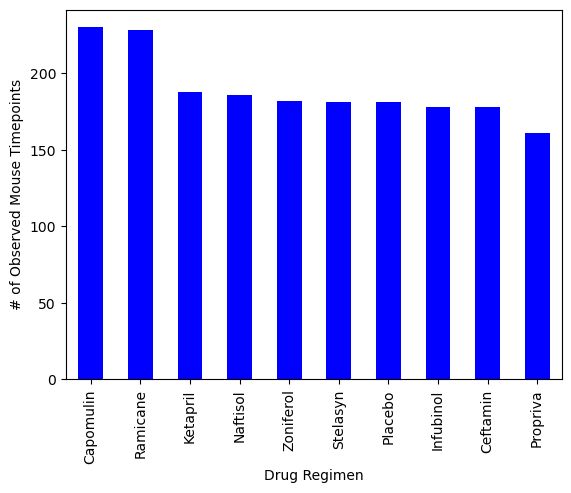

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_and_time_df = combined_data[["Drug Regimen", "Timepoint"]]
mouse_per_drug_regimen_df = mouse_id_and_time_df["Drug Regimen"].value_counts()

mouse_per_drug_regimen_df.plot(kind = "bar",
                               color = "blue",
                               xlabel = "Drug Regimen",
                               ylabel = "# of Observed Mouse Timepoints")

plt.show()

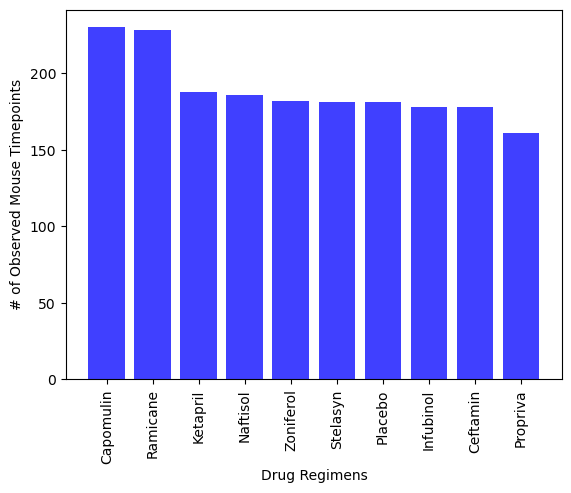

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = mouse_per_drug_regimen_df.index.values
count_timepoints = mouse_per_drug_regimen_df.values
plt.bar(drug_regimens, count_timepoints, color = "blue", alpha = 0.75, align = "center")

plt.xlabel("Drug Regimens")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation = 90)

plt.show()


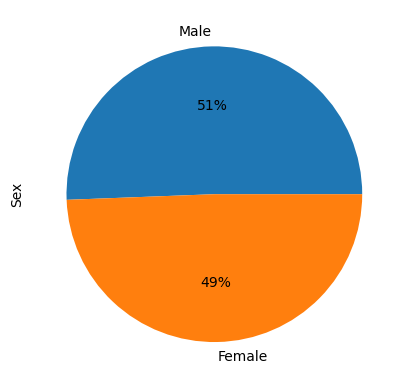

In [21]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = [ " Female", "Male"]
overall_gender_mouse = combined_data["Sex"].value_counts()

# Make the pie chart
overall_gender_mouse.plot(kind = "pie",
                             autopct = "%1.0f%%",
                             ylabel = "Sex")

plt.show()

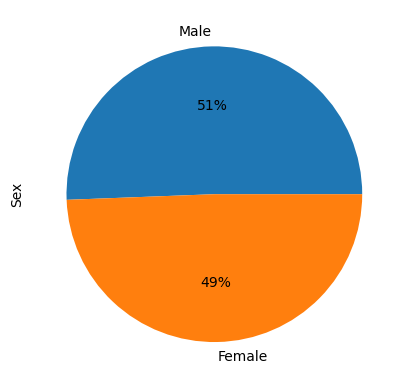

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels= overall_gender_mouse.index.values
sizes = overall_gender_mouse.values

# Make the pie chart
plt.pie(sizes, labels = labels, autopct = "%1.0f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_timepoint_df = combined_data.groupby(['Mouse ID'])
group_greatest_timepoint_df = group_timepoint_df['Timepoint'].max()
group_greatest_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_data, group_greatest_timepoint_df, how = "right", on = ["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

loop_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in loop_drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_drug_tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume.append(mice_drug_tumor_volumes)
    # add subset


    # Determine outliers using upper and lower bounds
    quartiles = mice_drug_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq - lowerq)
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

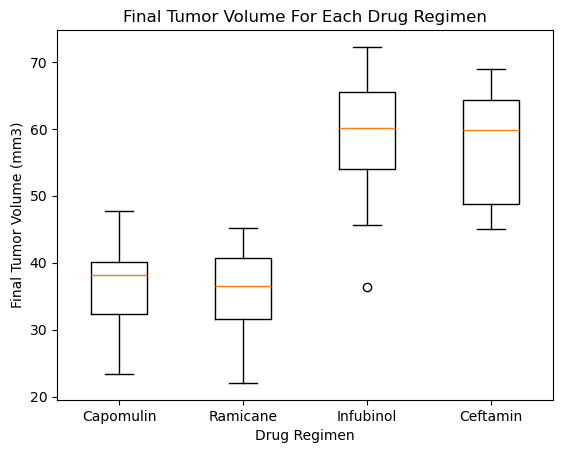

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
labels_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.boxplot(tumor_volume, tick_labels = labels_drug_regimens)

plt.title("Final Tumor Volume For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

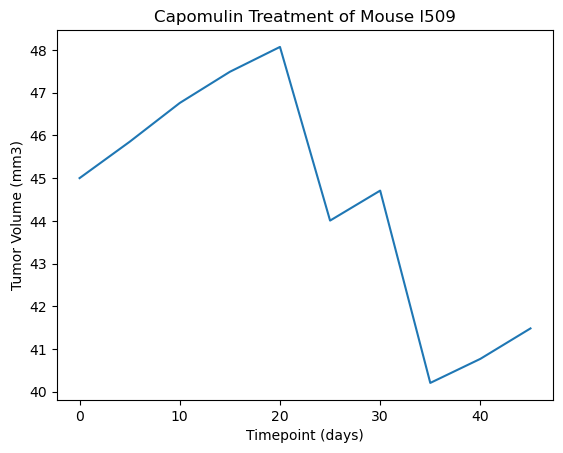

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
combined_data['Mouse ID'].unique()

capomulin_volume_timepoint_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
    
unique_mice_ids = capomulin_volume_timepoint_df['Mouse ID'].unique()

# Need to use used l509 mouse id as given in the final answer of the graph

mouse_l509 = capomulin_volume_timepoint_df.loc[capomulin_volume_timepoint_df['Mouse ID'] == 'l509']

# Create the varaibles for the graph

tumor_volume_l509 = mouse_l509['Tumor Volume (mm3)']
timepoint_l509 = mouse_l509['Timepoint']

# Create the line graph

plt.plot(timepoint_l509, tumor_volume_l509)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

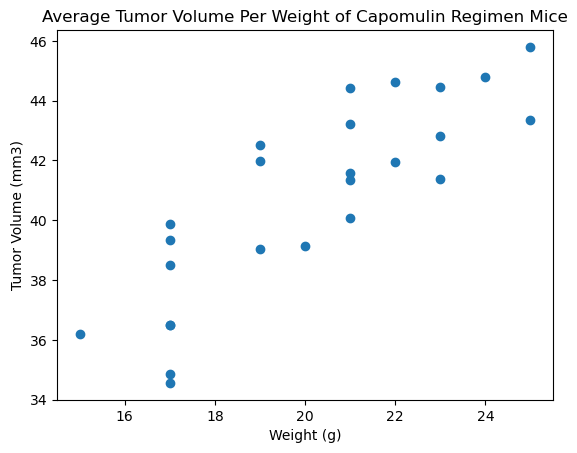

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create a new variable excluding the specific mouse ID since we are doing the average of all mice on Capomulin

volume_weight = combined_data.loc[(combined_data)["Drug Regimen"] == ("Capomulin")]
grouped_volume_weight = volume_weight.groupby("Mouse ID")

# Need to calculate the average of the observed 

tumor_volume_average = grouped_volume_weight[("Tumor Volume (mm3)")].mean()
weight_average = grouped_volume_weight[("Weight (g)")].mean()

# Tested dataframe, not going to be part of the graph, I just want to see if the data works
#capolmulin_tumorweight_average_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_volume_average,
                                                 #"Weight (g)": weight_average})
#capolmulin_tumorweight_average_df

# Plot the scatter graph using the variables above

plt.scatter(weight_average, tumor_volume_average)

plt.title("Average Tumor Volume Per Weight of Capomulin Regimen Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


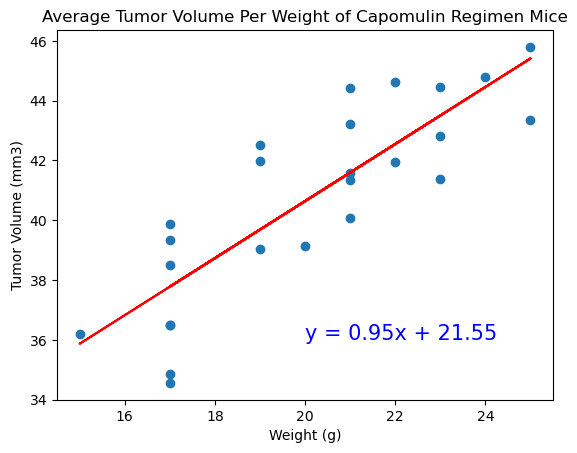

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Correlation coefficient for graph above

correlation = st.pearsonr(weight_average, tumor_volume_average)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")

# Do the scatter plot from above iclunding the linear regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_average, tumor_volume_average)
regress_values = weight_average * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight_average, tumor_volume_average)
plt.plot(weight_average, regress_values, "r-")

plt.title("Average Tumor Volume Per Weight of Capomulin Regimen Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.annotate(line_equation, (20,36), fontsize = 15, color = "blue")

plt.show()